In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
def get_velocity(vel_x, vel_y, vel_z):
    return math.sqrt(math.pow(vel_x, 2) + math.pow(vel_y, 2) + math.pow(vel_z, 2))

In [3]:
def get_energy(vel, h):  
    Ek =(0.5)*math.pow(vel, 2)
    Ep = 10*h
    return Ek + Ep

In [4]:
def get_feature_by_type(data, feature, selected_type):
    type_index = data.loc[(data['class'] == selected_type), 'index'].to_numpy().astype('int')
    return feature[type_index, :]

In [5]:
data = pd.read_csv("train.csv")

In [6]:
data = data.drop('targetName', axis=1)
data.rename(columns={'Unnamed: 0':'index'}, inplace=True)
data

,index,Time_0,posX_0,posY_0,posZ_0,velX_0,velY_0,velZ_0,Time_1,posX_1,...,velY_28,velZ_28,Time_29,posX_29,posY_29,posZ_29,velX_29,velY_29,velZ_29,class
0,0,0,0,0,476.575673,486.926974,3.057090,305.119216,0.5,241.974495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,1,0,0,0,8073.292719,561.240579,0.939582,16.840572,0.5,284.446308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
2,2,0,0,0,7804.597004,438.284572,-0.340086,-13.597957,0.5,217.255563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
3,3,0,0,0,18373.333536,425.454268,-3.073235,75.937858,0.5,209.276126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
4,4,0,0,0,98.521291,240.365164,2.128843,203.312840,0.5,157.357468,...,-1.793284,421.374077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28741,28741,0,0,0,10467.904201,557.116717,5.274202,103.343329,0.5,274.027446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
28742,28742,0,0,0,21234.059045,456.398272,-1.218920,470.479750,0.5,228.194794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
28743,28743,0,0,0,1421.529354,334.224149,2.211883,250.205035,0.5,168.601951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
28744,28744,0,0,0,6091.138582,346.224835,6.850324,-144.027865,0.5,169.487667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7


In [7]:
SUM_LABELS = 25
MAX_TIME = 30

x_cols = [f'posX_{i}' for i in range(MAX_TIME)]
y_cols = [f'posY_{i}' for i in range(MAX_TIME)]
z_cols = [f'posZ_{i}' for i in range(MAX_TIME)]
velX_cols = [f'velX_{i}' for i in range(MAX_TIME)]
velY_cols = [f'velY_{i}' for i in range(MAX_TIME)]
velZ_cols = [f'velZ_{i}' for i in range(MAX_TIME)]
pos_x, pos_y, pos_z = data.loc[:, x_cols].to_numpy(), data.loc[:, y_cols].to_numpy(), data.loc[:, z_cols].to_numpy()
vel_x, vel_y, vel_z = data.loc[:, velX_cols].to_numpy(), data.loc[:, velY_cols].to_numpy(), data.loc[:, velZ_cols].to_numpy()

#### How many rocket are there of each type?

In [8]:
data['class'].value_counts()

3     1873
1     1607
8     1603
7     1603
2     1583
5     1570
6     1460
4     1360
13    1355
9     1312
10    1227
24    1005
14    1003
20     986
12     962
11     934
17     883
21     866
25     832
18     819
22     814
15     793
19     782
23     777
16     737
Name: class, dtype: int64

### feature engineer: adding time, distance, velocity and energy to dataframe

In [9]:
times = np.array([int(data.loc[i, :'velZ_29'].last_valid_index().split("_")[1]) for i in range(len(data))])
data['time'] = times
data

,index,Time_0,posX_0,posY_0,posZ_0,velX_0,velY_0,velZ_0,Time_1,posX_1,...,velZ_28,Time_29,posX_29,posY_29,posZ_29,velX_29,velY_29,velZ_29,class,time
0,0,0,0,0,476.575673,486.926974,3.057090,305.119216,0.5,241.974495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,12
1,1,0,0,0,8073.292719,561.240579,0.939582,16.840572,0.5,284.446308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,27
2,2,0,0,0,7804.597004,438.284572,-0.340086,-13.597957,0.5,217.255563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,17
3,3,0,0,0,18373.333536,425.454268,-3.073235,75.937858,0.5,209.276126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,22
4,4,0,0,0,98.521291,240.365164,2.128843,203.312840,0.5,157.357468,...,421.374077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28741,28741,0,0,0,10467.904201,557.116717,5.274202,103.343329,0.5,274.027446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,22
28742,28742,0,0,0,21234.059045,456.398272,-1.218920,470.479750,0.5,228.194794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,14
28743,28743,0,0,0,1421.529354,334.224149,2.211883,250.205035,0.5,168.601951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,18
28744,28744,0,0,0,6091.138582,346.224835,6.850324,-144.027865,0.5,169.487667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,9


In [10]:
pos = np.array([math.dist((data.loc[i, f'posX_{data.loc[i, "time"]}'], data.loc[i, f'posZ_{data.loc[i, "time"]}']), (0, 0)) for i in range(len(data))])
data['distance'] = pos

In [11]:
velocities = np.array([
    np.array([get_velocity(vel_x[i, j], vel_y[i, j], vel_z[i, j]) for j in range(MAX_TIME)]) for i in range(len(vel_x))
])
for i in range(MAX_TIME):
    data['vel_{}'.format(i)] = velocities[:, i]

In [12]:
energies = np.array([
    np.array([get_energy(velocities[i, j], pos_z[i, j]) for j in range(MAX_TIME)]) for i in range(len(vel_x))
])
for i in range(MAX_TIME):
    data['energy_{}'.format(i)] = energies[:, i]


In [13]:
data.columns[200:300]

Index(['posZ_28', 'velX_28', 'velY_28', 'velZ_28', 'Time_29', 'posX_29',
       'posY_29', 'posZ_29', 'velX_29', 'velY_29', 'velZ_29', 'class', 'time',
       'distance', 'vel_0', 'vel_1', 'vel_2', 'vel_3', 'vel_4', 'vel_5',
       'vel_6', 'vel_7', 'vel_8', 'vel_9', 'vel_10', 'vel_11', 'vel_12',
       'vel_13', 'vel_14', 'vel_15', 'vel_16', 'vel_17', 'vel_18', 'vel_19',
       'vel_20', 'vel_21', 'vel_22', 'vel_23', 'vel_24', 'vel_25', 'vel_26',
       'vel_27', 'vel_28', 'vel_29', 'energy_0', 'energy_1', 'energy_2',
       'energy_3', 'energy_4', 'energy_5', 'energy_6', 'energy_7', 'energy_8',
       'energy_9', 'energy_10', 'energy_11', 'energy_12', 'energy_13',
       'energy_14', 'energy_15', 'energy_16', 'energy_17', 'energy_18',
       'energy_19', 'energy_20', 'energy_21', 'energy_22', 'energy_23',
       'energy_24', 'energy_25', 'energy_26', 'energy_27', 'energy_28',
       'energy_29'],
      dtype='object')

### Some drawing

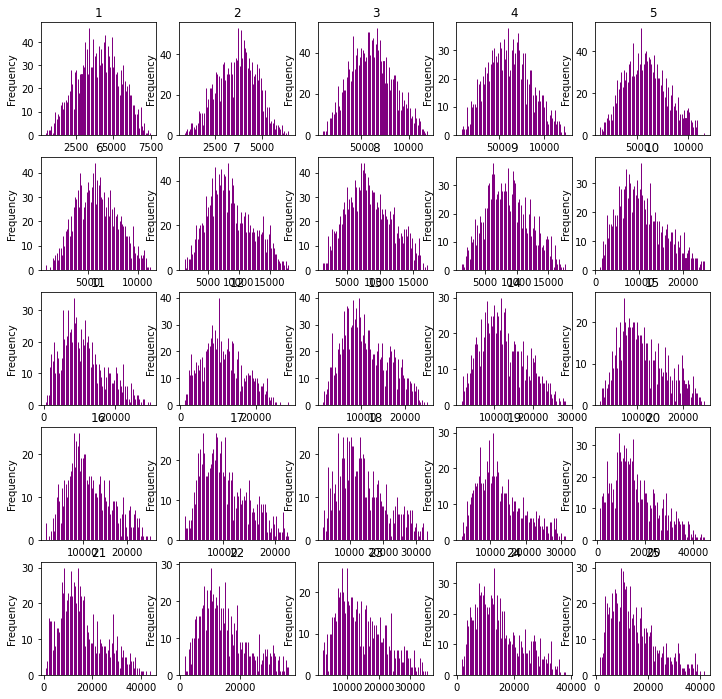

In [14]:

for i in range(1, SUM_LABELS + 1):
    plt.subplot(5, 5, i)
    plt.title('{}'.format(i))
    data[data['class'] == i]['distance'].plot.hist(edgecolor='purple', color='pink', width=0.4, bins=80, figsize=(12, 12))

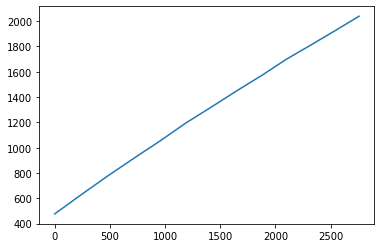

In [15]:
plt.plot(pos_x[0], pos_z[0])

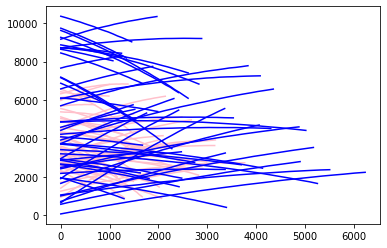

In [16]:
routes = [data.loc[data['class'] == i][:50] for i in (1, 6)]
x1, z1 = routes[0].loc[:, x_cols], routes[0].loc[:, z_cols]
for i in range(len(routes[0])):
    plt.plot(x1.iloc[i], z1.iloc[i], color="pink")
x6, z6 = routes[1].loc[:, x_cols], routes[1].loc[:, z_cols]
for i in range(len(routes[1])):
    plt.plot(x6.iloc[i], z6.iloc[i], color="blue")

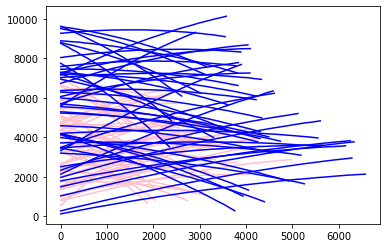

In [17]:
routes = [data.loc[(data['class'] == i) & (data['time'] == (MAX_TIME - 1))][:50] for i in (1, 6)]
x1, z1 = routes[0].loc[:, x_cols], routes[0].loc[:, z_cols]
for i in range(len(routes[0])):
    plt.plot(x1.iloc[i], z1.iloc[i], color="pink")
x6, z6 = routes[1].loc[:, x_cols], routes[1].loc[:, z_cols]
for i in range(len(routes[1])):
    plt.plot(x6.iloc[i], z6.iloc[i], color="blue")

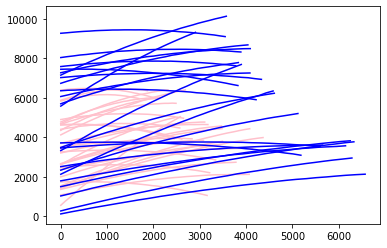

In [18]:
for i in range(len(routes[0])):
    if all([z1.iloc[i].argmax() != 0, z1.iloc[i].argmax() != data.loc[i, "time"]]) :
        plt.plot(x1.iloc[i], z1.iloc[i], color="pink")
        
for i in range(len(routes[1])):
    if all([z6.iloc[i].argmax() != 0, z6.iloc[i].argmax() != data.loc[i, "time"]]) :
        plt.plot(x6.iloc[i], z6.iloc[i], color="blue")

## classification for types 1 vs 16

In [19]:
types_1_16 = data[(data['class'] == 1) | (data['class'] == 16)]

In [20]:
training = types_1_16.sample(n=int(0.8*len(types_1_16)))
training[training.isnull()] = 0
training = training.astype(float)

In [21]:
testing = pd.concat([types_1_16, training]).drop_duplicates(keep=False)
testing[testing.isnull()] = 0
testing = testing.astype(float)

In [22]:
classifing, testing = testing['class'], testing.drop('class', axis=1)

### draw energy for each time

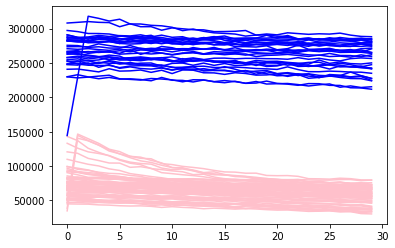

In [23]:
type1_energy = get_feature_by_type(training[training['time'] == MAX_TIME - 1], energies, 1)
type16_energy = get_feature_by_type(training[training['time'] == MAX_TIME - 1], energies, 16)
for energy in type1_energy:
    plt.plot(energy, color='pink')
for energy in type16_energy:
    plt.plot(energy, color='blue')
    

## classifying

In [24]:
testing_energy = energies[testing['index'].to_numpy().astype('int'), :]

predict = np.array([np.nanmax(energy) for energy in testing_energy])
predict[predict <= 160000] = 1
predict[predict > 160000] = 16
confusion_matrix(classifing.to_numpy(), predict, labels=[1, 16])
f1_score(classifing.to_numpy(), predict, labels=[1, 16])

1.0

## Machine learning - logistic regression

In [25]:
logisticRegr = LogisticRegression(max_iter=10000)

logisticRegr.fit(training.drop('class', axis=1).to_numpy(), training['class'].to_numpy())
logisticRegr.predict(testing)
score = logisticRegr.score(testing, classifing)
score

0.9995033523714925

## Machine learning - Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
model.fit(training.drop('class', axis=1).to_numpy(), training['class'].to_numpy())
rf_predictions = model.predict(testing)
roc_value = roc_auc_score(rf_predictions, classifing)
roc_value

1.0

# Classify types

In [27]:
def classify_types(data, selected_types):
    cond = data['class'] == selected_types[0]
    for t in selected_types[1:]:
        cond = cond | (data['class'] == t)
    types = data[cond]
    training, testing = train_test_split(types.drop('index', axis=1), test_size=0.2)
    training[training.isnull()] = 0
    training = training.astype(float)
    testing[testing.isnull()] = 0
    testing = testing.astype(float)
    classifing, testing = testing['class'], testing.drop('class', axis=1)

    model = RandomForestClassifier(n_estimators=100,
                                   bootstrap = True,
                                   max_features = 'sqrt',
                                   max_depth=30,
                                   min_samples_split = 20)
    model.fit(training.drop('class', axis=1).to_numpy(), training['class'].to_numpy())
    rf_predictions = model.predict(testing)
    return confusion_matrix(rf_predictions, classifing), f1_score(classifing, rf_predictions, average='micro')

#### classification for types 5 vs 6

In [28]:
classify_types(data, [5, 6])

(array([[172, 154],
        [144, 136]], dtype=int64),
 0.5082508250825083)

#### classification for types 12 vs 15

In [29]:
classify_types(data, [12, 15])

(array([[175,  10],
        [ 11, 155]], dtype=int64),
 0.9401709401709402)

#### classification for types 3 vs 9

In [30]:
classify_types(data, [3, 9])

(array([[377,   0],
        [  1, 259]], dtype=int64),
 0.9984301412872841)

#### Classifying 4 types

In [33]:
classify_types(data, [1, 4, 7, 10])

(array([[350,   0,   0,   0],
        [  0, 268,   0,   2],
        [  0,   1, 305,  37],
        [  0,   0,   5, 192]], dtype=int64),
 0.9612068965517241)

# Part 2

In [34]:
def classify_to_optimize(data, selected_types, n_estimators, max_depth):
    cond = data['class'] == selected_types[0]
    for t in selected_types[1:]:
        cond = cond | (data['class'] == t)
    types = data[cond]
    training, testing = train_test_split(types.drop('index', axis=1), test_size=0.2)
    training[training.isnull()] = 0
    training = training.astype(float)
    testing[testing.isnull()] = 0
    testing = testing.astype(float)
    classifing, testing = testing['class'], testing.drop('class', axis=1)

    model = RandomForestClassifier(n_estimators=n_estimators,
                                   bootstrap = True,
                                   max_features = 'sqrt',
                                   max_depth=max_depth,
                                  min_samples_split = 5)
    model.fit(training.drop('class', axis=1).to_numpy(), training['class'].to_numpy())
    test_predict = model.predict(testing)
    train_predict = model.predict(training.drop('class', axis=1))
    return confusion_matrix(test_predict, classifing), f1_score(classifing, test_predict, average='micro'), confusion_matrix(train_predict, training['class']), f1_score(training['class'], train_predict, average='micro')

In [35]:
for i in range(10):
    n_estimators = random.randint(10, 100)
    max_depth = random.randint(5, 25)
    print("(", n_estimators, max_depth, ")")
    for x in classify_to_optimize(data, [12, 15], n_estimators, max_depth):
        print(x)
    print("----")

( 75 6 )
[[181   4]
 [ 16 150]]
0.9430199430199431
[[730   7]
 [ 35 632]]
0.9700854700854701
----
( 51 20 )
[[180   8]
 [  9 154]]
0.9515669515669516
[[773   1]
 [  0 630]]
0.9992877492877493
----
( 60 20 )
[[185  13]
 [  4 149]]
0.9515669515669516
[[773   1]
 [  0 630]]
0.9992877492877493
----
( 50 25 )
[[174   8]
 [ 11 158]]
0.9458689458689459
[[777   1]
 [  0 626]]
0.9992877492877493
----
( 55 19 )
[[171   7]
 [  8 165]]
0.9572649572649573
[[783   0]
 [  0 621]]
1.0
----
( 31 24 )
[[193   7]
 [  8 143]]
0.9572649572649573
[[761   1]
 [  0 642]]
0.9992877492877493
----
( 32 9 )
[[187   9]
 [  8 147]]
0.9515669515669516
[[762   0]
 [  5 637]]
0.9964387464387464
----
( 89 14 )
[[189  11]
 [  5 146]]
0.9544159544159544
[[768   0]
 [  0 636]]
1.0
----
( 67 9 )
[[184   5]
 [ 15 147]]
0.9430199430199431
[[761   3]
 [  2 638]]
0.9964387464387464
----
( 20 25 )
[[200  10]
 [  8 133]]
0.9487179487179487
[[752   0]
 [  2 650]]
0.9985754985754985
----


## Machine learning - Decision Tree

In [36]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [38]:
def classify_types(data, selected_types):
    cond = data['class'] == selected_types[0]
    for t in selected_types[1:]:
        cond = cond | (data['class'] == t)
    types = data[cond]
    training, testing = train_test_split(types.drop('index', axis=1), test_size=0.2)
    training[training.isnull()] = 0
    training = training.astype(float)
    testing[testing.isnull()] = 0
    testing = testing.astype(float)
    classifing, testing = testing['class'], testing.drop('class', axis=1)

    model = DecisionTreeRegressor(random_state=0, max_depth=3)
    model.fit(training.drop('class', axis=1).to_numpy(), training['class'].to_numpy())
    dt_predictions = model.predict(testing)
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
    tree.plot_tree(model, filled = True)

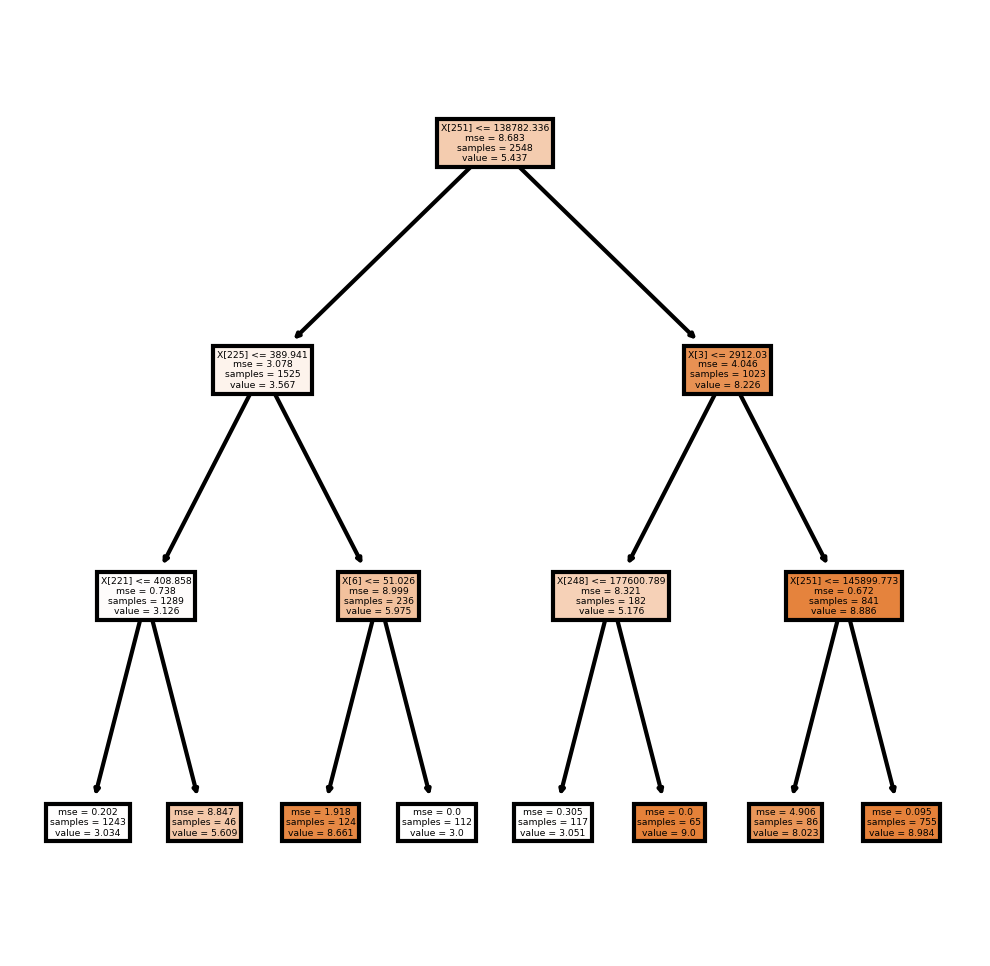

In [39]:
classify_types(data, [3, 9])

In [40]:
testing.columns[251]

'energy_8'

In [41]:
testing.columns[225]

'vel_12'

In [42]:
testing.columns[221]

'vel_8'

In [43]:
testing.columns[6]

'velY_0'

In [44]:
testing.columns[248]

'energy_5'